***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* 8. Calibration 
    * Previous: [8.1 Calibration as a least-squares problem](8_1_Calibration_Least_Squares_Problem.ipynb)
    * Next: [8.3 2GC Calibration](8_3_2GC.ipynb)

***

Import standard modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 6)

Populating the interactive namespace from numpy and matplotlib


Import section specific modules:

In [3]:
from IPython.display import Image

## 8.2 First Generation Calibration (1GC)<a id='cal:sec:1gccal'></a>

The preceding chapters of this course have hopefully made it clear that an interferometer does not perform error-free measurements. On the contrary, an interferomter's measurements will be corrupted by a variety of effects. These include environmental effects such as the atmosphere, as well as faults and inaccuracies in the system itself. Naturally, doing good science requires good data. This is the purpose of calibration - given a signal which has been corrupted in a variety of ways, we can restore it to something resembling the truth.

The starting point of this discussion is 1GC or first generation calibration, to give it its full name. This form of calibration is usually the initial step in a series of calibration efforts. 1GC is performed using calibrator observations. 

## 8.2.1 Calibrator Observations<a id='cal:sec:calobs'></a>

These are observations of a source with known parameters such as flux, shape and spectrum. Observations of calibrators are interspersed with observations of the target field. This is done so that the calibrator observations track changes in the observational parameters. Thus, it is possible to solve for calibrator gain solutions which can then be transeferred to the target field. This is usually an effective method of removing large-scale errors in the visibilities. The requirements placed on calibrator sources vary based on which quantity is being calibrated. 

Absolute flux calibration is used to determine the true flux of sources in the field. This is necessary to ensure that the flux values obtained are correctly scaled. This type of calibration requires a very bright, invariant calibrator which is either point-like or well-modelled.

Bandpass calibration is used to correct for errors along the frequency axis of the observation. These errors can be introduced by both the system and the atmosphere. Performing bandpass calibration requires a very bright, invariant point-like or well-modelled source with a known spectum. The number of calibrator sources which satisfy these conditions is low; they are often very far away from the target. 

Delay calibration is used to remove the phase delay error which manifests as a linear ramp in the bandpass. This is often done before bandpass calibration, as it can be fit once to all the data. This is usually performed using the same calibrator source as the bandpass calibration.

Gain calibration is used to determine the complex valued gains. This is done regularly throughout the observation. The calibrator source needs to be relatively bright but, more importantly, it needs to be close to the target. This is because the gain calibrator is used to track the evolution of local effects, such as the atmosphere. As such, the closer the calibrator is to the target, the more likely it is to be subject to the same effects. 

In practice, absolute flux, delay, and bandpass calibration can all be performed using the same calibrator. Gain calibration could also be performed using this calibrator, but only if it was sufficiently close to the target. This is not usually the case and a unique calibrator is required for determining the complex gains.

Below is a schematic representation of how an observation might be broken up. Note that this is not accurate by any means, but merely hopes to convey the idea behind calibrator observations and 1GC.

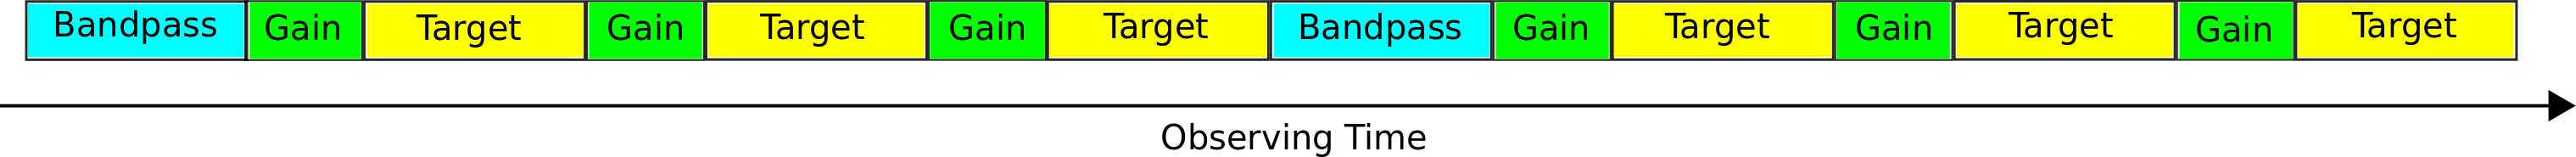

In [4]:
Image(filename='figures/observe.png')

One point has been neglected in the above discussion: how do we actually calibrate using the calbrator observations? The answer is, fortunately, relatively simple. As you have seen in [Sec. 8.1 &#10142;](../8_Calibration/8_1_Calibration_Least_Squares_Problem.ipynb#pos:sec:lst)<!--\ref{pos:sec:lst}-->, it is possible to treat calibration as a least-squares problem. 1GC is no exception. One helpful fact is that the model will usually contain only a single source. For a point source at the centre of the field, the model reduces to simply the amplitude of the calibrator multiplied by the antenna gains. For more complicated calibrator sources, this will not be the case. However, given a sufficiently accurate source model, complcated calibrators can still be used.

Once the calibrator solutions have been found, the final obstacle is transferring the solution to the target field. In the simplest case, this can be done by applying the results from a calibrator observation to the subsequent target field observation/s. It is also possible to do more complicated solution transfers by interpolating between values or fitting curves across the solutions.

## 8.2.2 Closure Quantities<a id='cal:sec:closure'></a>

There are other methods of calibration which predate the use of least-squares solvers. One such method makes use of closure quantites as presented in [<cite data-cite='Jennison1958'>A phase sensitive interferometer technique for the measurement of the Fourier transforms of spatial brightness distributions of small angular extent</cite> &#10548;](http://mnras.oxfordjournals.org/content/118/3/276.short). Whilst this method of calibration is no longer widely used, the quantites it introduces are of interest. These quantities are the closure phase and closure amplitude. 

In [ ]:
Image(filename='figures/triangle.png')

In order to define closure phase, we imagine that we have a three antenna array. We can think of these antennas as the vertices of a triangle. The sides of the triangle then represent the baselines. Each baseline observes a visbility as given by the following expression: 

$$\tilde{v}_{pq} = g_pv_{pq}g_{q}^{*}$$


In the above expression, $\tilde{v}_{pq}$ is the measured visibility, $v_{pq}$ is the true visibility, $g_p$ is the gain of antenna p and $g_{q}^{*}$ is the conjugate of the gain of antenna q. The indices p and q are simply placeholders for the antennas. It is possible to write this out in terms of the amplitude ($A$) and phase ($\phi
$) of the various contributions to the visibility.

\begin{eqnarray}
\tilde{v}_{pq} &=& A_{p}e^{-\imath\phi_p}A_{pq}e^{-\imath\phi_{pq}}A_{q}e^{\imath\phi_q} \\
&=& A_{p}A_{pq}A_{q}e^{\imath(-\phi_p-\phi_{pq}+\phi_q)}
\end{eqnarray} 



These expressions are all that is required to reach the definitions of closure phase and amplitude. For our three antenna case outlined above, we can substitue in the indices for baselines $ij$, $jk$ and $ki$. Note that this is equivalent to moving clockwise around the triangle from the $i$ vertex. For closure phase, we are only intrested in the argument of the above expression. 

\begin{eqnarray}
\tilde{\phi}_{ij} &=& arg(\tilde{v}_{ij}) = -\phi_i-\phi_{ij}+\phi_j \\
\tilde{\phi}_{jk} &=& arg(\tilde{v}_{jk}) = -\phi_j-\phi_{jk}+\phi_k \\
\tilde{\phi}_{ki} &=& arg(\tilde{v}_{ki}) = -\phi_k-\phi_{ki}+\phi_i
\end{eqnarray} 

$\tilde{\phi}$ represents the total phase of the relevant baseline. Adding these three expressions together we obtain:

$$\tilde{\phi}_{ij} + \tilde{\phi}_{jk} + \tilde{\phi}_{ki} = -\phi_{ij} - \phi_{jk} - \phi_{ki}$$

This relationship is known as closure phase. What makes this interesting is that the phase contributions of the gains cancel, and we are left with the sum of the true phases. We are free to swap either all or some of the indices on the true phases provided we also swap their sign. This is equvalent to taking the conjugate of the orginal $\tilde{v}_{pq}$.

Closure phase is still a useful observable as it can be used to measure the performance of an interferometer. For a point source at the center of the field of view, the phase closure should be close to zero as the individual true phases should be zero. Naturally, in the presence of noise, this will never be perfect. However, if the closure phase is large, it is a good indicator that something is wrong in the sytem. By taking the closure phase for each group of three antennas, it is possible to identify faulty antennas - if every closure phase invovling antenna $i$ is significantly more or less than zero, it is likely that that antenna needs to be flagged.

Amplitude closure is also a useful observable. Its derivation is rather simple, as simple substitution can show that it is true. For four antennas $i$, $j$, $k$ and $l$, we can write the following expression:  

$$\frac{\lvert \tilde{v}_{ij} \rvert \lvert \tilde{v}_{kl} \rvert}{\lvert \tilde{v}_{ik} \rvert \lvert \tilde{v}_{jl} \rvert}$$

If we substitue in equations of the following form,

$$ \tilde{v}_{pq} = A_{p}e^{-\imath\phi_p}A_{pq}e^{-\imath\phi_{pq}}A_{q}e^{\imath\phi_q}, $$ 

we get the following, noting that the exponential terms fall away in the abosolute value: 

$$\frac{\lvert A_iA_{ij}A_{j} \rvert \lvert A_kA_{kl}A_{l} \rvert}{\lvert A_iA_{ik}A_{k} \rvert \lvert A_jA_{jl}A_{l} \rvert}$$

The amplitude terms which belong to the gains cancel, and we are left with a closure amplitude relationship.

$$\frac{\lvert \tilde{v}_{ij} \rvert \lvert \tilde{v}_{kl} \rvert}{\lvert \tilde{v}_{ik} \rvert \lvert \tilde{v}_{jl} \rvert} = \frac{\lvert A_{ij} \rvert \lvert A_{kl} \rvert}{\lvert A_{ik} \rvert \lvert A_{jl} \rvert}$$

As for the case of closure phase, we can eilminate the contribution of the gains and obtain a measure of the true amplitude. For a point source at the center of the field, we expect each baseline to have the same amplitude, and the above expression should be unity. This can once again be used as a diagnostic.

***

Next: [8.3 2GC Calibration](8_3_2GC.ipynb)